In [1]:
import numpy as np
import pandas as pd

In [2]:
Mdata=pd.read_csv("matches.csv")
Ddata=pd.read_csv("deliveries.csv")

In [ ]:
Mdata.head()

In [3]:
mdata=Mdata[['id','city','team1','team2','toss_winner','toss_decision','winner','win_by_runs','win_by_wickets',]]

In [ ]:
mdata.head()

In [ ]:
Ddata.head()

In [ ]:
print(Ddata.columns)


In [5]:
Ddata.columns = Ddata.columns.str.strip()


In [8]:
Ddata = Ddata.drop(columns=['fielder', 'dismissal_kind', 'extra_runs', 'batsman_runs', 'penalty_runs', 'legbye_runs', 'bye_runs'])


In [9]:
Ddata=Ddata.drop(columns=['noball_runs','wide_runs'])

In [ ]:
print(Ddata.columns)

In [ ]:
print(mdata.columns)

In [10]:
totalscore=Ddata.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [ ]:
totalscore

In [11]:
d=Ddata

In [12]:
d['ball']=d['ball']+d['over']*6-6

In [13]:
Ddata=d

In [ ]:
Ddata.drop(columns=['over'])

In [16]:
D1=Ddata[Ddata['inning']==1]

In [ ]:
D1

In [17]:
D1['player_dismissed'] = D1['player_dismissed'].apply(lambda x: 0 if pd.isna(x) else 1)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19680\2494721915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D1['player_dismissed'] = D1['player_dismissed'].apply(lambda x: 0 if pd.isna(x) else 1)


In [22]:
D1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,total_runs,player_dismissed
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,4,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
178949,11415,1,Mumbai Indians,Chennai Super Kings,20,116,KA Pollard,MJ McClenaghan,DJ Bravo,0,0,0
178950,11415,1,Mumbai Indians,Chennai Super Kings,20,117,KA Pollard,MJ McClenaghan,DJ Bravo,0,0,0
178951,11415,1,Mumbai Indians,Chennai Super Kings,20,118,KA Pollard,MJ McClenaghan,DJ Bravo,0,1,1
178952,11415,1,Mumbai Indians,Chennai Super Kings,20,119,KA Pollard,JJ Bumrah,DJ Bravo,0,4,0


In [18]:

D1['player_dismissed']=D1.groupby(['match_id','inning'])['player_dismissed'].cumsum()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19680\3360790600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D1['player_dismissed']=D1.groupby(['match_id','inning'])['player_dismissed'].cumsum()


In [19]:
D1=D1.drop(columns=['bowler','over','batsman','non_striker'])

In [20]:
D1['total_runs']=D1.groupby(['match_id'])['total_runs'].cumsum()

In [21]:
D1=D1[D1['is_super_over']==0]

In [ ]:
D1

In [22]:
D1.drop(columns=['is_super_over'])

,match_id,inning,batting_team,bowling_team,ball,total_runs,player_dismissed
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,4,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4,4,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,5,6,0
...,...,...,...,...,...,...,...
178949,11415,1,Mumbai Indians,Chennai Super Kings,116,143,7
178950,11415,1,Mumbai Indians,Chennai Super Kings,117,143,7
178951,11415,1,Mumbai Indians,Chennai Super Kings,118,144,8
178952,11415,1,Mumbai Indians,Chennai Super Kings,119,148,8


In [ ]:
mdata.columns

In [23]:
merged = pd.merge(mdata, D1, left_on='id', right_on='match_id')

In [24]:
merged=merged.drop(columns=['match_id'])

In [ ]:
merged

In [25]:
merged=merged.drop(columns=['is_super_over'])

In [26]:
merged=merged.drop(columns=['team1','team2'])

In [ ]:
merged.columns

In [27]:
merged['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [28]:
merged=merged[~merged['batting_team'].isin(['Rising Pune Supergiant', 'Pune Warriors','Kochi Tuskers Kerala','Gujarat Lions'])]

In [29]:
merged=merged[~merged['bowling_team'].isin(['Rising Pune Supergiant', 'Gujarat Lions','Pune Warriors','Kochi Tuskers Kerala'])]

In [30]:
merged['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Rising Pune Supergiants', 'Delhi Capitals'],
      dtype=object)

In [ ]:
merged.columns

In [31]:
merged['toss_winner'] = merged['toss_winner'].str.replace('Delhi Daredevils','Delhi Capitals')

In [32]:
merged['winner'] = merged['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
merged['batting_team'] = merged['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
merged['bowling_team'] = merged['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

In [33]:
merged['toss_winner'] = merged['toss_winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
merged['winner'] = merged['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
merged['batting_team'] = merged['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
merged['bowling_team'] = merged['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [ ]:
merged['batting_team'].unique()

In [ ]:
merged.columns

In [35]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()


In [ ]:
merged['toss_decision']

In [37]:
merged['toss_decision']=l.fit_transform(merged['toss_decision'])

In [ ]:
merged['toss_decision']

In [38]:
merged['winner'] = merged.apply(lambda row: 1 if row['batting_team'] == row['winner'] else 0, axis=1)


In [39]:
merged['toss_winner'] = merged.apply(lambda row: 1 if row['toss_winner'] == row['batting_team'] else 0, axis=1)


In [ ]:
merged['toss_winner']

In [41]:
merged.dropna(inplace=True)

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')


In [43]:
merged=merged.drop(columns=['win_by_runs','win_by_wickets'])

In [44]:
merged = merged[(merged['batting_team'] == 'Royal Challengers Bangalore') & 
                (merged['bowling_team'] == 'Chennai Super Kings')]


In [45]:
from sklearn.model_selection import train_test_split
Y=merged['winner']
X=merged.drop(columns=['winner','id'])

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1 )

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [60]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))#D
])

In [48]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())#D
])

In [49]:

pipe.fit(X_train,y_train)#D

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [50]:
y_pred = pipe.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)#D

0.9737704918032787

In [52]:
confusion_matrix(y_test,y_pred)

array([[222,   4],
       [  4,  75]], dtype=int64)

In [ ]:
pipe.predict_proba(X_test)

In [67]:
X_test.iloc[[30]]

,city,toss_winner,toss_decision,inning,batting_team,bowling_team,ball,total_runs,player_dismissed
62625,Bangalore,0,1,1,Royal Challengers Bangalore,Chennai Super Kings,99,112,4


In [60]:
data_to_predict = pd.DataFrame([['Bangalore', 0, 1, 1, 'Royal Challengers Bangalore', 'Chennai Super Kings',85, 152, 4]],
                               columns=['city', 'toss_winner', 'toss_decision', 'inning', 'batting_team', 'bowling_team', 'ball', 'total_runs', 'player_dismissed'])

In [69]:
data_to_predict

,city,toss_winner,toss_decision,inning,batting_team,bowling_team,ball,total_runs,player_dismissed
0,Bangalore,0,1,1,Royal Challengers Bangalore,Chennai Super Kings,9,22,5


In [61]:
pipe.predict_proba(data_to_predict)

array([[0.73, 0.27]])

In [71]:
import matplotlib.pyplot as plt

In [72]:

y_proba = pipe.predict_proba(X_test)

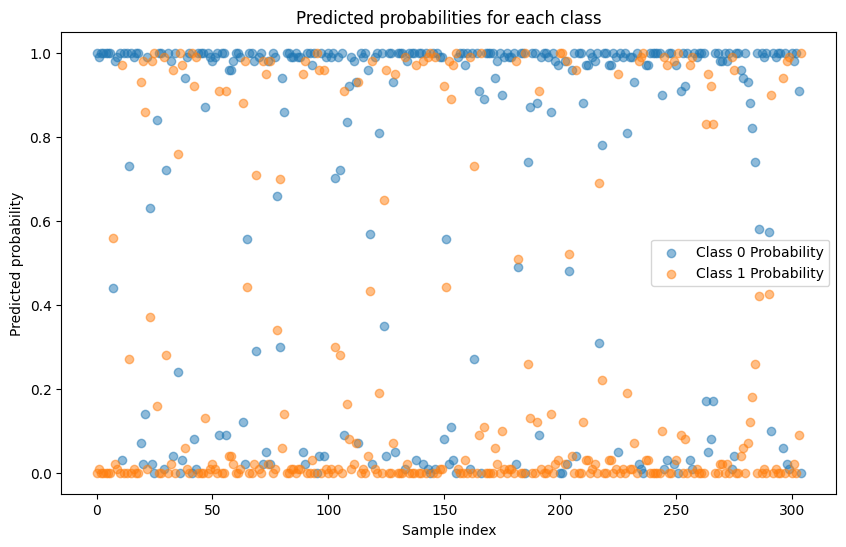

In [73]:
plt.figure(figsize=(10, 6))
for i in range(y_proba.shape[1]):
    plt.scatter(range(len(y_proba)), y_proba[:, i], label=f'Class {i} Probability', alpha=0.5)

plt.xlabel('Sample index')
plt.ylabel('Predicted probability')
plt.title('Predicted probabilities for each class')
plt.legend()
plt.show()

In [74]:
pipe.predict_proba(X_test.iloc[[90]])

array([[0.02, 0.98]])